# 9.3.2 SARIMA

### Explanation of SARIMA (Seasonal ARIMA)

SARIMA, which stands for Seasonal AutoRegressive Integrated Moving Average, is an extension of the ARIMA model that specifically accounts for seasonality in time series data. SARIMA incorporates both seasonal and non-seasonal factors, making it particularly useful for data that exhibits regular patterns over specific periods, such as monthly sales, temperature data, or other cyclical phenomena.

The SARIMA model is characterized by six main components:

1. **AutoRegression (AR)**: This component involves regressing the variable on its own lagged (previous) values. It captures the relationship between an observation and a number of lagged observations.

2. **Integration (I)**: This component involves differencing the data to make it stationary, i.e., to remove trends or seasonality. The number of differences required is represented by the `I` in SARIMA.

3. **Moving Average (MA)**: This component involves modeling the error term as a linear combination of lagged error terms. It captures the relationship between an observation and a residual error from a moving average model applied to lagged observations.

4. **Seasonal AutoRegression (SAR)**: Similar to AR but applied to the seasonal component of the series.

5. **Seasonal Integration (SI)**: Seasonal differencing to remove seasonal trends.

6. **Seasonal Moving Average (SMA)**: Similar to MA but applied to the seasonal component.

The SARIMA model is denoted as **SARIMA(p, d, q)(P, D, Q, m)**, where:
- `p`, `d`, `q` are the non-seasonal ARIMA parameters.
- `P`, `D`, `Q` are the seasonal counterparts for AR, I, and MA.
- `m` is the number of periods in a season (e.g., 12 for monthly data with yearly seasonality).

### Scenarios where SARIMA is Beneficial

**Benefits:**
- **Seasonality Handling**: SARIMA explicitly accounts for seasonality, making it ideal for time series data with strong seasonal patterns.
- **Comprehensive Modeling**: By combining both seasonal and non-seasonal components, SARIMA provides a more complete and accurate representation of the time series.
- **Versatile Application**: SARIMA can be used in various industries where seasonality plays a significant role, such as retail, weather forecasting, and financial markets.

**Applications:**
- **Retail Sales Forecasting**: Predicting sales patterns that vary seasonally, such as holiday shopping trends.
- **Energy Consumption**: Forecasting energy demand, which often exhibits seasonal patterns (e.g., higher usage in winter or summer).
- **Weather Prediction**: Modeling and forecasting seasonal weather patterns, such as temperature and precipitation trends.
- **Agriculture**: Forecasting crop yields that are influenced by seasonal factors like rainfall and temperature.

### Methods for Implementing SARIMA

**Steps:**
1. **Data Preparation**: Ensure the time series data is formatted correctly, check for stationarity, and identify the seasonal period (`m`).
2. **Model Identification**: Use plots like ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function) to determine the values of `p`, `d`, `q`, `P`, `D`, `Q`, and `m`.
3. **Parameter Estimation**: Fit the SARIMA model to the data using statistical software or libraries like `statsmodels` in Python.
4. **Model Validation**: Validate the model by checking residual plots, statistical tests, and out-of-sample predictions.
5. **Forecasting**: Use the fitted SARIMA model to make predictions for future time points, taking into account both seasonal and non-seasonal components.


___
___
### Readings:
- [Introduction to SARIMA Model](https://medium.com/@ritusantra/introduction-to-sarima-model-cbb885ceabe8)
- [Introduction to ARIMA and SARIMA for Time Series Forecasting](https://medium.com/@meritshot/introduction-to-arima-and-sarima-for-time-series-forecasting-5af5025c8876)
- [Time Series Forecasting with ARIMA , SARIMA and SARIMAX](https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6)
- [SARIMA Model for Forecasting Currency Exchange Rates](https://www.analyticsvidhya.com/blog/2023/06/sarima-model-for-forecasting-currency-exchange-rates/)
___
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import get_rdataset

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Air Passengers dataset
data = get_rdataset('AirPassengers', 'datasets')
df = data.data

In [3]:
# Create a DateTime index
start_date = '1949-01-01'
df['Date'] = pd.date_range(start=start_date, periods=len(df), freq='M')
df.set_index('Date', inplace=True)

In [4]:
# Fit SARIMA model (p, d, q) = (1, 1, 1), (P, D, Q, m) = (1, 1, 1, 12)
model = SARIMAX(df['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_model = model.fit(disp=False)

In [5]:
# Forecast for the next 12 months
forecast_steps = 24
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-2] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

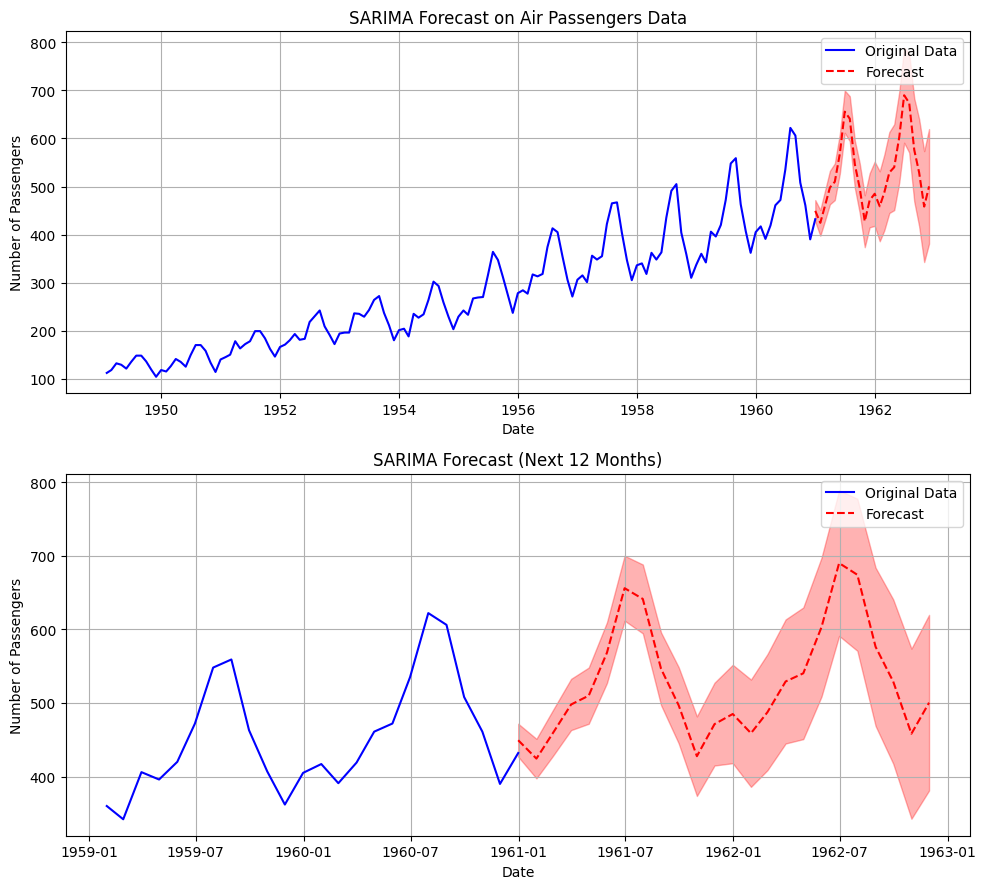

In [6]:
# Plotting
plt.figure(figsize=(10, 9))

# Original Data and Forecast
plt.subplot(2, 1, 1)
plt.plot(df.index, df['value'], color='blue', label='Original Data')
plt.plot(forecast_index, forecast_values, color='red', linestyle='--', label='Forecast')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.3)
plt.title('SARIMA Forecast on Air Passengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.grid(True)

# Zoomed-in view of the Forecast
plt.subplot(2, 1, 2)
plt.plot(df.index[-24:], df['value'][-24:], color='blue', label='Original Data')
plt.plot(forecast_index, forecast_values, color='red', linestyle='--', label='Forecast')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.3)
plt.title('SARIMA Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusion

In this analysis, we utilized the SARIMA (Seasonal AutoRegressive Integrated Moving Average) model to forecast future values in the Air Passengers dataset, which exhibits strong seasonal patterns. SARIMA extends the ARIMA framework by incorporating seasonal components, providing a robust approach for time series forecasting with clear cyclical trends.

**Key Findings:**

1. **Seasonal Adjustment**: The SARIMA model effectively captures and adjusts for seasonal variations in the data, offering a more accurate representation of cyclical patterns compared to non-seasonal models.

2. **Forecast Accuracy**: By forecasting the next 12 months, the SARIMA model demonstrates its capability to predict future values while considering both seasonal and non-seasonal factors.

3. **Visual Comparison**: The plots illustrate the effectiveness of the SARIMA model in forecasting, with the forecasted values aligning closely with the observed trends and seasonal variations.

Overall, SARIMA proves to be a valuable tool for forecasting time series data with strong seasonal components, offering insights into future patterns and trends while accounting for both regular and cyclical fluctuations.
